Code which demonstrates the full range of inspiral options. This is kept here for the convenience of the authors when carrying out convergence tests. We recommend using the code in <em>InspiralExamples.ipynb</em>.

# Preliminaries

To change the number of threads, run the cell below and then change the notebook's kernel to the newly created one. The page might need to be refreshed before the new kernel comes up as an option 

In [1]:
# using IJulia
# installkernel("Julia 4 threads", env=Dict("JULIA_NUM_THREADS"=>"4"));

In [1]:
Threads.nthreads()

4

The underlying parameters used in this notebook can be changed in the "params.jl" file.

In [2]:
# include("../dependencies.jl");

In [3]:
using HDF5, LaTeXStrings, Plots.PlotMeasures, Plots

In [4]:
include("params.jl");

# Evolution using fourier fits in Boyer-Lindquist time

### Compute the inspiral using GSL and Julia's base function

This inspiral, and those below, are evolved for a total of ~10,000 seconds, or 2.8 hours.

In [6]:
@time ChimeraInspiral.FourierFit.BLTime.compute_inspiral(a, p, e, θmin, sign_Lz, q, psi0, chi0, phi0, nPointsGeodesic, nPointsFitGSL, nHarmGSL, t_range_factor_BL, compute_fluxes_BL, t_max_M, gsl_fit, reltol, abstol; data_path=data_path)

File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_nHarm_2_fit_range_factor_0.5_BL_fourier_GSL_fit.h5
268.568578 seconds (50.98 M allocations: 9.294 GiB, 1.34% gc time, 37.59% compilation time: <1% of which was recompilation)


In [7]:
@time ChimeraInspiral.FourierFit.BLTime.compute_inspiral(a, p, e, θmin, sign_Lz, q, psi0, chi0, phi0, nPointsGeodesic, nPointsFitJulia, nHarmJulia, t_range_factor_BL, compute_fluxes_BL, t_max_M, julia_fit, reltol, abstol; data_path=data_path)

File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_nHarm_3_fit_range_factor_0.5_BL_fourier_Julia_fit.h5
152.580451 seconds (11.43 M allocations: 24.810 GiB, 2.46% gc time, 1.10% compilation time: 3% of which was recompilation)


### Plot constants of motion

In [5]:
# load trajectory
t_BL_GSL, r_BL_GSL, θ_BL_GSL, ϕ_BL_GSL, dr_dt_BL_GSL, dθ_dt_BL_GSL, dϕ_dt_BL_GSL, d2r_dt2_BL_GSL, d2θ_dt2_BL_GSL, d2ϕ_dt2_BL_GSL, dt_dτ_BL_GSL = 
ChimeraInspiral.FourierFit.BLTime.load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_BL, gsl_fit, data_path);

t_BL_GSL = t_BL_GSL * MtoSecs;


# load fluxes
t_Fluxes_BL_GSL, EE_BL_GSL, Edot_BL_GSL, LL_BL_GSL, Ldot_BL_GSL, QQ_BL_GSL, Qdot_BL_GSL, CC_BL_GSL, Cdot_BL_GSL, pArray_BL_GSL, ecc_BL_GSL, θmin_BL_GSL = 
ChimeraInspiral.FourierFit.BLTime.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_BL, gsl_fit, data_path);

t_Fluxes_BL_GSL = t_Fluxes_BL_GSL * MtoSecs;

ι_BL_GSL = @. acos(LL_BL_GSL / sqrt(LL_BL_GSL^2 + CC_BL_GSL));

In [6]:
# load trajectory
t_BL_Julia, r_BL_Julia, θ_BL_Julia, ϕ_BL_Julia, dr_dt_BL_Julia, dθ_dt_BL_Julia, dϕ_dt_BL_Julia, d2r_dt2_BL_Julia, d2θ_dt2_BL_Julia, d2ϕ_dt2_BL_Julia, dt_dτ_BL_Julia = 
ChimeraInspiral.FourierFit.BLTime.load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_BL, julia_fit, data_path);

t_BL_Julia = t_BL_Julia * MtoSecs;

t_Fluxes_BL_Julia, EE_BL_Julia, Edot_BL_Julia, LL_BL_Julia, Ldot_BL_Julia, QQ_BL_Julia, Qdot_BL_Julia, CC_BL_Julia, Cdot_BL_Julia, pArray_BL_Julia, ecc_BL_Julia, θmin_BL_Julia = 
ChimeraInspiral.FourierFit.BLTime.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_BL, julia_fit, data_path);

t_Fluxes_BL_Julia = t_Fluxes_BL_Julia * MtoSecs;

ι_BL_Julia = @. acos(LL_BL_Julia / sqrt(LL_BL_Julia^2 + CC_BL_Julia));

# load fluxes
t_Fluxes_BL_Julia, EE_BL_Julia, Edot_BL_Julia, LL_BL_Julia, Ldot_BL_Julia, QQ_BL_Julia, Qdot_BL_Julia, CC_BL_Julia, Cdot_BL_Julia, pArray_BL_Julia, ecc_BL_Julia, θmin_BL_Julia = 
ChimeraInspiral.FourierFit.BLTime.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_BL, julia_fit, data_path);

t_Fluxes_BL_Julia = t_Fluxes_BL_Julia * MtoSecs;

ι_BL_Julia = @. acos(LL_BL_Julia / sqrt(LL_BL_Julia^2 + CC_BL_Julia));

In [7]:
# some plot attributes
gsl_col = :red
gsl_ls = :solid
gsl_lw = 2.0

julia_col = :blue
julia_ls = :dash
julia_lw = 2.0
wave_im_ratio = 5   # width / height
wave_height = 300; wave_width = wave_height * wave_im_ratio
xtickfontsize=10; ytickfontsize=10; guidefontsize=15;
# margins
left_margin = 8mm; right_margin=8mm; top_margin=8mm; bottom_margin=8mm;

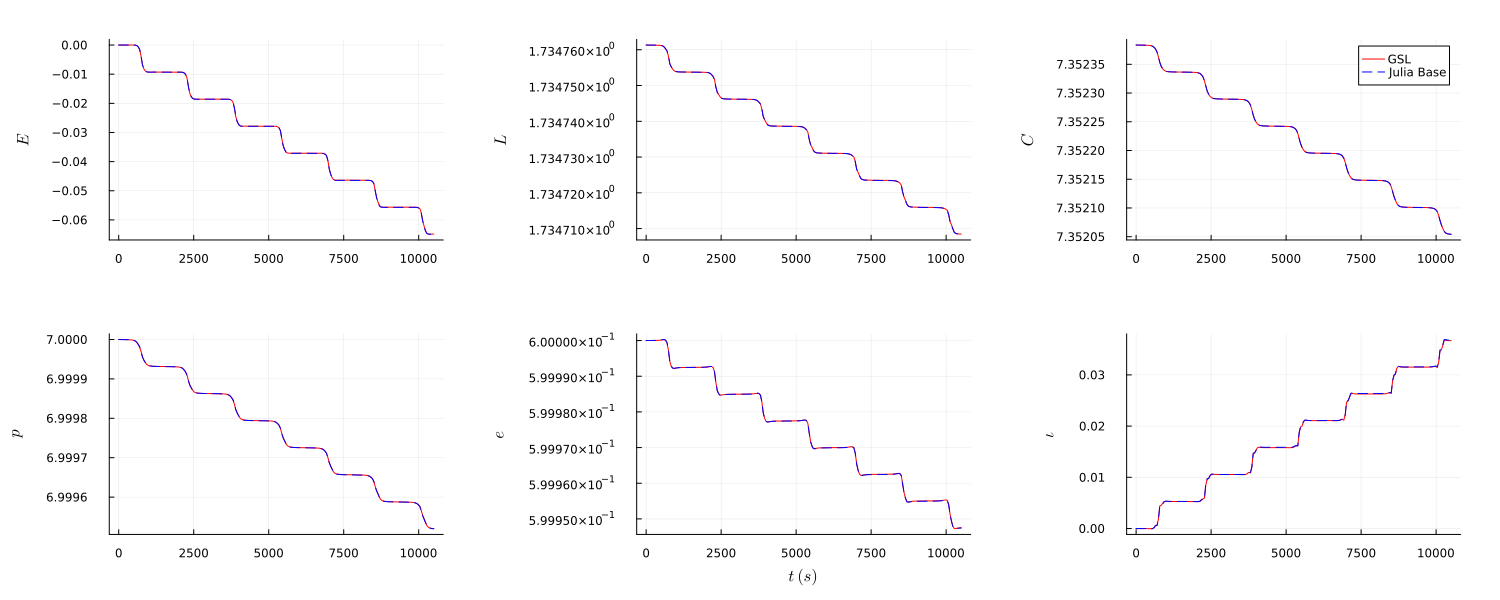

In [8]:
gr()
plotE = Plots.plot(t_Fluxes_BL_GSL, 1e4 * (EE_BL_GSL .- EE_BL_GSL[1]), ylabel=L"E", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotE, t_Fluxes_BL_Julia, 1e4 * (EE_BL_Julia .- EE_BL_Julia[1]), legend=:false, color=julia_col, linestyle=julia_ls)


plotL = Plots.plot(t_Fluxes_BL_GSL, LL_BL_GSL, ylabel=L"L", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotL, t_Fluxes_BL_Julia, LL_BL_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotC = Plots.plot(t_Fluxes_BL_GSL, CC_BL_GSL, ylabel=L"C", label="GSL",
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotC, t_Fluxes_BL_Julia, CC_BL_Julia, label="Julia Base", color=julia_col, linestyle=julia_ls)

plotP = Plots.plot(t_Fluxes_BL_GSL, pArray_BL_GSL, ylabel=L"p", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotP, t_Fluxes_BL_Julia, pArray_BL_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotEcc = Plots.plot(t_Fluxes_BL_GSL, ecc_BL_GSL, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotEcc, t_Fluxes_BL_Julia, ecc_BL_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotι = Plots.plot(t_Fluxes_BL_GSL, 1e4 * (ι_BL_GSL .- ι_BL_GSL[1]), ylabel=L"\iota", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotι, t_Fluxes_BL_Julia,1e4 * (ι_BL_Julia .- ι_BL_Julia[1]), legend=:false, color=julia_col, linestyle=julia_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]), 
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

### Gravitational waveform

In [9]:
@time ChimeraInspiral.FourierFit.BLTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_BL, gsl_fit, data_path);
t_wf_BL_GSL, h_plus_BL_GSL, h_cross_BL_GSL = ChimeraInspiral.FourierFit.BLTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_BL, gsl_fit, data_path);

File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_nHarm_2_fit_range_factor_0.5_BL_fourier_GSL_fit.jld2
 16.516241 seconds (553.57 M allocations: 8.920 GiB, 15.88% gc time, 62.08% compilation time: 12% of which was recompilation)


In [10]:
@time ChimeraInspiral.FourierFit.BLTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_BL, julia_fit, data_path);
t_wf_BL_Julia, h_plus_BL_Julia, h_cross_BL_Julia = ChimeraInspiral.FourierFit.BLTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_BL, julia_fit, data_path);

File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_nHarm_3_fit_range_factor_0.5_BL_fourier_Julia_fit.jld2
  5.816627 seconds (542.27 M allocations: 8.323 GiB, 35.67% gc time, 1.90% compilation time: 33% of which was recompilation)


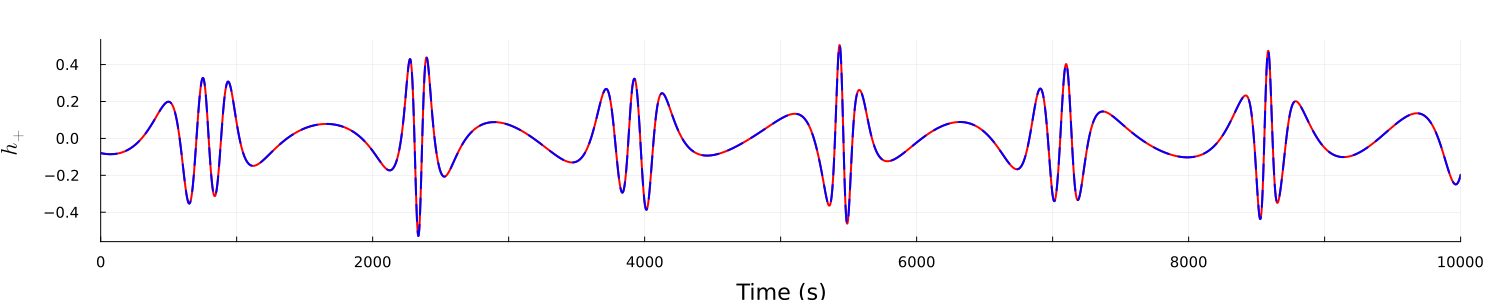

In [11]:
# NOTE: can multiply by "strain_to_SI" to convert waveform to SI units
gr()
p1 = plot(t_BL_GSL, h_plus_BL_GSL, 
color=gsl_col,
linestyle=gsl_ls,
linewidth=gsl_lw,
xlims=(0, 10000),
legend =:false,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
label = "GSL",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
foreground_color_legend = nothing, background_color_legend = nothing, dpi=100)
plot!(t_BL_Julia, h_plus_BL_Julia, color=julia_col, linestyle=julia_ls, linewidth=julia_lw, label="Julia Base")

display("image/png", p1)

# Evolution using fourier fits in Mino time

Comparing inspiral using GSL and julia's base function

In [15]:
use_FDM=false
@time ChimeraInspiral.FourierFit.MinoTime.compute_inspiral(a, p, e, θmin, sign_Lz, q, psi0, chi0, phi0, nPointsFitGSL, nHarmGSL, t_range_factor_Mino_FF, compute_fluxes_Mino, t_max_M, use_FDM, gsl_fit, reltol, abstol;
        nPointsGeodesic=nPointsGeodesic, data_path=data_path)

File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_nHarm_2_fit_range_factor_0.05_Mino_fourier_GSL_fit.h5
173.962115 seconds (32.03 M allocations: 8.375 GiB, 1.48% gc time, 6.92% compilation time)


In [16]:
use_FDM=true
@time ChimeraInspiral.FourierFit.MinoTime.compute_inspiral(a, p, e, θmin, sign_Lz, q, psi0, chi0, phi0, nPointsFitJulia, nHarmJulia, t_range_factor_Mino_FF, compute_fluxes_Mino, t_max_M, use_FDM, julia_fit, reltol, abstol;
        h=h, data_path=data_path)

File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_nHarm_3_fit_range_factor_0.05_Mino_fourier_Julia_fit.h5
 13.595184 seconds (9.14 M allocations: 3.390 GiB, 4.80% gc time, 10.33% compilation time)


### Plot constants of motion

In [12]:
# load trajectory
λ_Mino_FF_GSL, t_Mino_FF_GSL, r_Mino_FF_GSL, θ_Mino_FF_GSL, ϕ_Mino_FF_GSL, dr_dt_Mino_FF_GSL, dθ_dt_Mino_FF_GSL, dϕ_dt_Mino_FF_GSL,
d2r_dt2_Mino_FF_GSL, d2θ_dt2_Mino_FF_GSL, d2ϕ_dt2_Mino_FF_GSL, dt_dτ_Mino_FF_GSL, dt_dλ_Mino_FF_GSL = 
ChimeraInspiral.FourierFit.MinoTime.load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_Mino_FF, gsl_fit, data_path);

t_Mino_FF_GSL = t_Mino_FF_GSL * MtoSecs;

t_Fluxes_Mino_FF_GSL, EE_Mino_FF_GSL, Edot_Mino_FF_GSL, LL_Mino_FF_GSL, Ldot_Mino_FF_GSL, QQ_Mino_FF_GSL, Qdot_Mino_FF_GSL, CC_Mino_FF_GSL, Cdot_Mino_FF_GSL,
pArray_Mino_FF_GSL, ecc_Mino_FF_GSL, θmin_Mino_FF_GSL = ChimeraInspiral.FourierFit.MinoTime.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_Mino_FF, gsl_fit, data_path);
t_Fluxes_Mino_FF_GSL = t_Fluxes_Mino_FF_GSL * MtoSecs;

ι_Mino_FF_GSL = @. acos(LL_Mino_FF_GSL / sqrt(LL_Mino_FF_GSL^2 + CC_Mino_FF_GSL));

In [13]:
# load trajectory
λ_Mino_FF_Julia, t_Mino_FF_Julia, r_Mino_FF_Julia, θ_Mino_FF_Julia, ϕ_Mino_FF_Julia, dr_dt_Mino_FF_Julia, dθ_dt_Mino_FF_Julia, dϕ_dt_Mino_FF_Julia,
d2r_dt2_Mino_FF_Julia, d2θ_dt2_Mino_FF_Julia, d2ϕ_dt2_Mino_FF_Julia, dt_dτ_Mino_FF_Julia, dt_dλ_Mino_FF_Julia = 
ChimeraInspiral.FourierFit.MinoTime.load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);

t_Mino_FF_Julia = t_Mino_FF_Julia * MtoSecs;

t_Fluxes_Mino_FF_Julia, EE_Mino_FF_Julia, Edot_Mino_FF_Julia, LL_Mino_FF_Julia, Ldot_Mino_FF_Julia, QQ_Mino_FF_Julia, Qdot_Mino_FF_Julia, CC_Mino_FF_Julia, Cdot_Mino_FF_Julia,
pArray_Mino_FF_Julia, ecc_Mino_FF_Julia, θmin_Mino_FF_Julia = ChimeraInspiral.FourierFit.MinoTime.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);
t_Fluxes_Mino_FF_Julia = t_Fluxes_Mino_FF_Julia * MtoSecs;

ι_Mino_FF_Julia = @. acos(LL_Mino_FF_Julia / sqrt(LL_Mino_FF_Julia^2 + CC_Mino_FF_Julia));

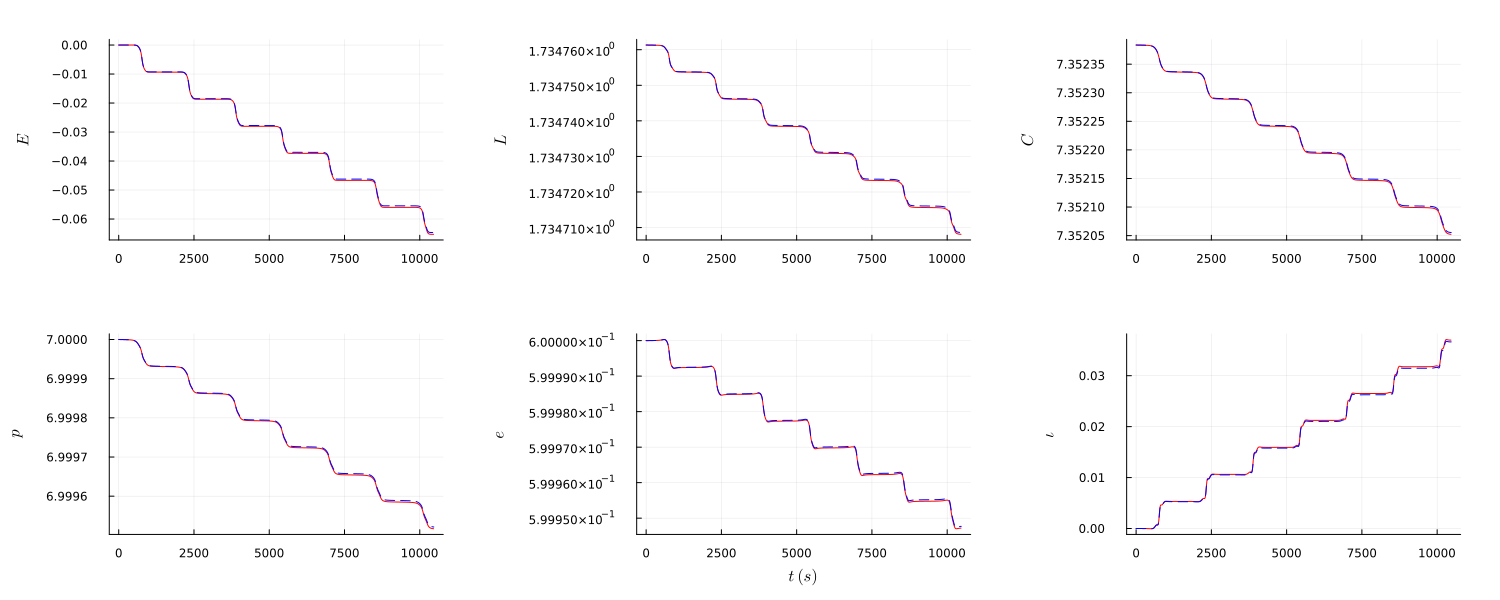

In [14]:
gr()
plotE = Plots.plot(t_Fluxes_Mino_FF_GSL, 1e4 * (EE_Mino_FF_GSL .- EE_Mino_FF_GSL[1]), ylabel=L"E", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
Plots.plot!(plotE, t_Fluxes_Mino_FF_Julia, 1e4 * (EE_Mino_FF_Julia .- EE_Mino_FF_Julia[1]), legend=:false, color=julia_col, linestyle=julia_ls)


plotL = Plots.plot(t_Fluxes_Mino_FF_GSL, LL_Mino_FF_GSL, ylabel=L"L", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

Plots.plot!(plotL, t_Fluxes_Mino_FF_Julia, LL_Mino_FF_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotC = Plots.plot(t_Fluxes_Mino_FF_GSL, CC_Mino_FF_GSL, ylabel=L"C", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

Plots.plot!(plotC, t_Fluxes_Mino_FF_Julia, CC_Mino_FF_Julia, label="Mino_FF_Julia Fourier Fit", color=julia_col, linestyle=julia_ls)

plotP = Plots.plot(t_Fluxes_Mino_FF_GSL, pArray_Mino_FF_GSL, ylabel=L"p", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

Plots.plot!(plotP, t_Fluxes_Mino_FF_Julia, pArray_Mino_FF_Julia, legend=:false, color=julia_col, linestyle=julia_ls)

plotEcc = Plots.plot(t_Fluxes_Mino_FF_GSL, ecc_Mino_FF_GSL, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

Plots.plot!(plotEcc, t_Fluxes_Mino_FF_Julia, ecc_Mino_FF_Julia, legend=:false, color=julia_col, linestyle=julia_ls)
    


plotι = Plots.plot(t_Fluxes_Mino_FF_GSL, 1e4 * (ι_Mino_FF_GSL .- ι_Mino_FF_GSL[1]), ylabel=L"\iota", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

    Plots.plot!(plotι, t_Fluxes_Mino_FF_Julia,1e4 * (ι_Mino_FF_Julia .- ι_Mino_FF_Julia[1]), legend=:false, color=julia_col, linestyle=julia_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]),
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

### Gravitational waveform

In [15]:
@time ChimeraInspiral.FourierFit.MinoTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_Mino_FF, gsl_fit, data_path);
t_wf_Mino_FF_GSL, h_plus_Mino_FF_GSL, h_cross_Mino_FF_GSL = ChimeraInspiral.FourierFit.MinoTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmGSL, t_range_factor_Mino_FF, gsl_fit, data_path);

File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_nHarm_2_fit_range_factor_0.05_Mino_fourier_GSL_fit.jld2
  6.989594 seconds (554.21 M allocations: 8.507 GiB, 35.54% gc time, 0.85% compilation time)


In [16]:
@time ChimeraInspiral.FourierFit.MinoTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);
t_wf_Mino_FF_Julia, h_plus_Mino_FF_Julia, h_cross_Mino_FF_Julia = ChimeraInspiral.FourierFit.MinoTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, nHarmJulia, t_range_factor_Mino_FF, julia_fit, data_path);

File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_nHarm_3_fit_range_factor_0.05_Mino_fourier_Julia_fit.jld2
  1.195071 seconds (96.57 M allocations: 1.483 GiB, 35.73% gc time)


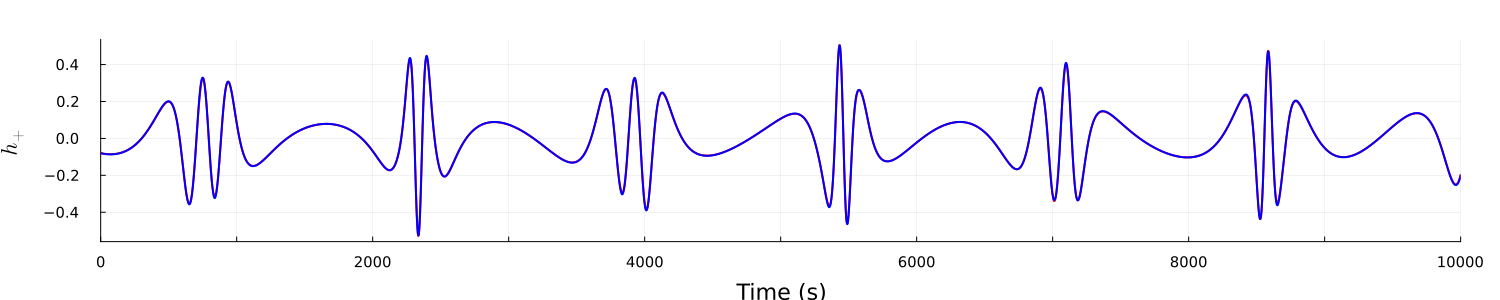

In [17]:
# NOTE: can multiply by "strain_to_SI" to convert waveform to SI units
gr()
p1 = plot(t_Mino_FF_GSL, h_plus_Mino_FF_GSL, 
color=gsl_col,
linestyle=gsl_ls,
linewidth=gsl_lw,
xlims=(0, 10000),
legend =:false,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
label = "GSL",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
foreground_color_legend = nothing, background_color_legend = nothing, dpi=100)

plot!(t_Mino_FF_Julia, h_plus_Mino_FF_Julia, color=julia_col, linestyle=gsl_ls, linewidth=julia_lw, label="Julia Base")
display("image/png", p1)

# Evolution using finite differences in Mino time

In [23]:
@time ChimeraInspiral.FiniteDifferences.MinoTime.compute_inspiral(a, p, e, θmin, sign_Lz, q, psi0, chi0, phi0, h, compute_fluxes_Mino, t_max_M, reltol, abstol; data_path=data_path)

File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_h_0.001_Mino_fdm.h5
  6.765852 seconds (9.16 M allocations: 423.586 MiB, 2.69% gc time, 78.32% compilation time)


In [24]:
@time MinoFDMInspiral.compute_inspiral(t_max_M, nPointsFDM, a, p, e, θmin, sign_Lz, q, psi0, chi0, phi0, h, reltol, abstol; data_path=data_path)

File created: ../Results/Data/EMRI_sol_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_h_0.001_Mino_fdm_turbo.h5
  7.428481 seconds (11.99 M allocations: 1.903 GiB, 5.84% gc time, 37.50% compilation time)


### Plot constants of motion

In [18]:
# load trajectory
λ_Mino_FDM, t_Mino_FDM, r_Mino_FDM, θ_Mino_FDM, ϕ_Mino_FDM, dr_dt_Mino_FDM, dθ_dt_Mino_FDM,
dϕ_dt_Mino_FDM, d2r_dt2_Mino_FDM, d2θ_dt2_Mino_FDM, d2ϕ_dt2_Mino_FDM, dt_dτ_Mino_FDM, dt_dλ_Mino_FDM = 
ChimeraInspiral.FiniteDifferences.MinoTime.load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);

t_Mino_FDM = t_Mino_FDM * MtoSecs;

t_Fluxes_Mino_FDM, EE_Mino_FDM, Edot_Mino_FDM, LL_Mino_FDM, Ldot_Mino_FDM, QQ_Mino_FDM, Qdot_Mino_FDM, CC_Mino_FDM, Cdot_Mino_FDM,
pArray_Mino_FDM, ecc_Mino_FDM, θmin_Mino_FDM = 
ChimeraInspiral.FiniteDifferences.MinoTime.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);
t_Fluxes_Mino_FDM = t_Fluxes_Mino_FDM * MtoSecs;

ι_Mino_FDM = @. acos(LL_Mino_FDM / sqrt(LL_Mino_FDM^2 + CC_Mino_FDM));

In [31]:
include("../MinoFDMInspiral.jl")

Main.MinoFDMInspiral

In [21]:
# load trajectory
λ_Mino_FDM_turbo, t_Mino_FDM_turbo, r_Mino_FDM_turbo, θ_Mino_FDFM_turbo, ϕ_Mino_FDFM_turbo, dr_dt_Mino_FDM_turbo, dθ_dt_Mino_FDM_turbo,
dϕ_dt_Mino_FDM_turbo, d2r_dt2_Mino_FDM_turbo, d2θ_dt2_Mino_FDM_turbo, d2ϕ_dt2_Mino_FDM_turbo, dt_dτ_Mino_FDM_turbo, dt_dλ_Mino_FDM_turbo = 
MinoFDMInspiral.load_trajectory(a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);

t_Mino_FDM_turbo = t_Mino_FDM_turbo * MtoSecs;

t_Fluxes_Mino_FDM_turbo, EE_Mino_FDM_turbo, Edot_Mino_FDM_turbo, LL_Mino_FDM_turbo, Ldot_Mino_FDM_turbo, QQ_Mino_FDM_turbo, Qdot_Mino_FDM_turbo, CC_Mino_FDM_turbo, Cdot_Mino_FDM_turbo,
pArray_Mino_FDM_turbo, ecc_Mino_FDM_turbo, θmin_Mino_FDM_turbo = 
MinoFDMInspiral.load_constants_of_motion(a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);
t_Fluxes_Mino_FDM_turbo = t_Fluxes_Mino_FDM_turbo * MtoSecs;

ι_Mino_FDM_turbo = @. acos(LL_Mino_FDM_turbo / sqrt(LL_Mino_FDM_turbo^2 + CC_Mino_FDM_turbo));

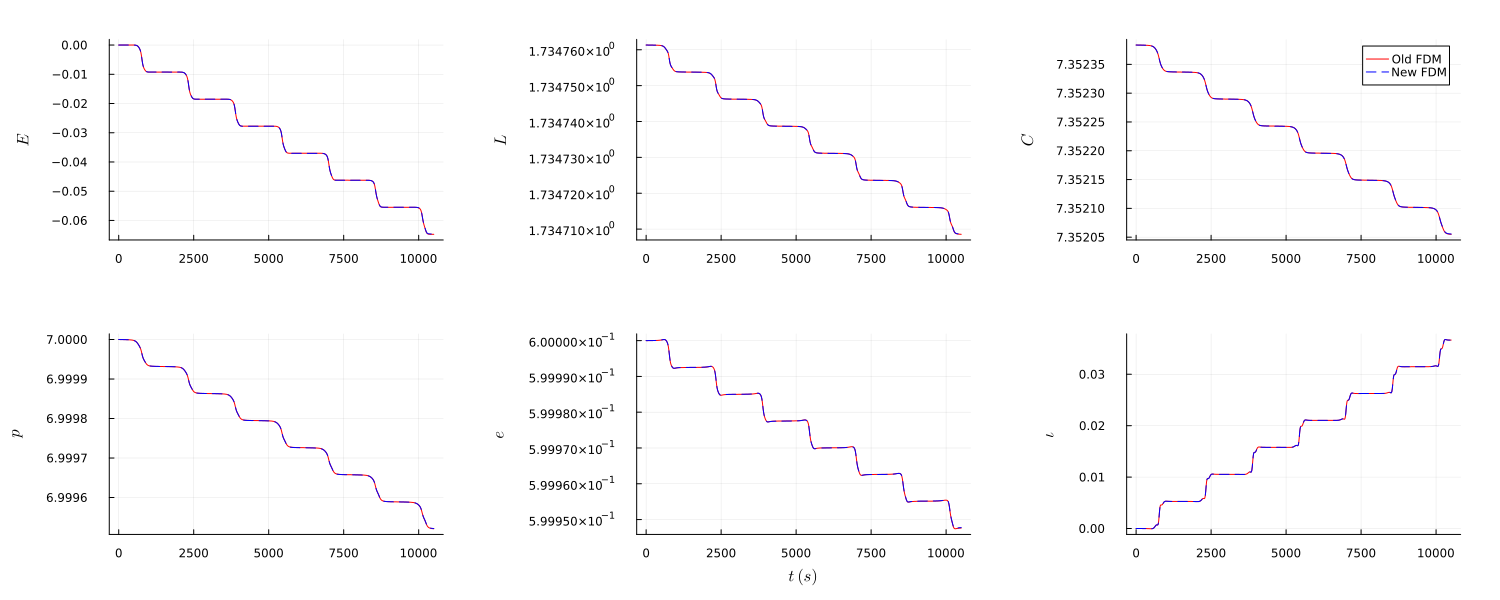

In [22]:

gr()
plotE = Plots.plot(t_Fluxes_Mino_FDM, 1e4 * (EE_Mino_FDM .- EE_Mino_FDM[1]), ylabel=L"E", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotL = Plots.plot(t_Fluxes_Mino_FDM, LL_Mino_FDM, ylabel=L"L", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotC = Plots.plot(t_Fluxes_Mino_FDM, CC_Mino_FDM, ylabel=L"C", legend=:true,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin,
    label="Old FDM")

plotP = Plots.plot(t_Fluxes_Mino_FDM, pArray_Mino_FDM, ylabel=L"p", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotEcc = Plots.plot(t_Fluxes_Mino_FDM, ecc_Mino_FDM, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)

plotι = Plots.plot(t_Fluxes_Mino_FDM, 1e4 * (ι_Mino_FDM .- ι_Mino_FDM[1]), ylabel=L"\iota", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


Plots.plot!(plotE, t_Fluxes_Mino_FDM_turbo, 1e4 * (EE_Mino_FDM_turbo .- EE_Mino_FDM_turbo[1]), legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotL, t_Fluxes_Mino_FDM_turbo, LL_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotC, t_Fluxes_Mino_FDM_turbo, CC_Mino_FDM_turbo, label="New FDM", color=julia_col, linestyle=julia_ls)
Plots.plot!(plotP, t_Fluxes_Mino_FDM_turbo, pArray_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotEcc, t_Fluxes_Mino_FDM_turbo, ecc_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotι, t_Fluxes_Mino_FDM_turbo,1e4 * (ι_Mino_FDM_turbo .- ι_Mino_FDM_turbo[1]), legend=:false, color=julia_col, linestyle=julia_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]),
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

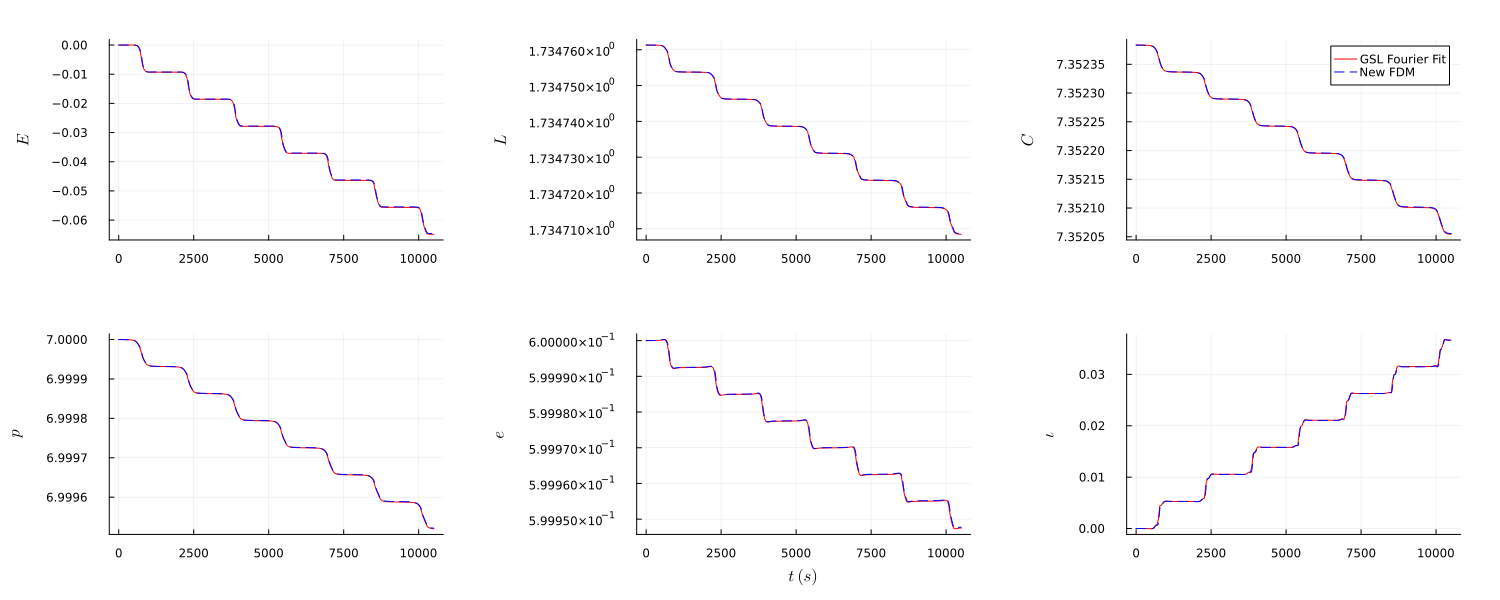

In [23]:
gr()
plotE = Plots.plot(t_Fluxes_BL_GSL, 1e4 * (EE_BL_GSL .- EE_BL_GSL[1]), ylabel=L"E", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotL = Plots.plot(t_Fluxes_BL_GSL, LL_BL_GSL, ylabel=L"L", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotC = Plots.plot(t_Fluxes_BL_GSL, CC_BL_GSL, ylabel=L"C", label="GSL Fourier Fit",
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotP = Plots.plot(t_Fluxes_BL_GSL, pArray_BL_GSL, ylabel=L"p", legend=:false, 
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotEcc = Plots.plot(t_Fluxes_BL_GSL, ecc_BL_GSL, ylabel=L"e", xlabel=L"t\ (s)", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)


plotι = Plots.plot(t_Fluxes_BL_GSL, 1e4 * (ι_BL_GSL .- ι_BL_GSL[1]), ylabel=L"\iota", legend=:false,
    color=gsl_col, linestyle=gsl_ls,
    left_margin =  left_margin,
    right_margin =  right_margin,
    top_margin =  top_margin,
    bottom_margin =  bottom_margin)
    
Plots.plot!(plotE, t_Fluxes_Mino_FDM_turbo, 1e4 * (EE_Mino_FDM_turbo .- EE_Mino_FDM_turbo[1]), legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotL, t_Fluxes_Mino_FDM_turbo, LL_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotC, t_Fluxes_Mino_FDM_turbo, CC_Mino_FDM_turbo, label="New FDM", color=julia_col, linestyle=julia_ls)
Plots.plot!(plotP, t_Fluxes_Mino_FDM_turbo, pArray_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotEcc, t_Fluxes_Mino_FDM_turbo, ecc_Mino_FDM_turbo, legend=:false, color=julia_col, linestyle=julia_ls)
Plots.plot!(plotι, t_Fluxes_Mino_FDM_turbo,1e4 * (ι_Mino_FDM_turbo .- ι_Mino_FDM_turbo[1]), legend=:false, color=julia_col, linestyle=julia_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]),
size=(1500, 600), dpi=100)
display("image/png", orbitalParamsPlot)

### Gravitational waveform

In [24]:
@time ChimeraInspiral.FiniteDifferences.MinoTime.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);
t_wf_Mino_FDM, h_plus_Mino_FDM, h_cross_Mino_FDM = ChimeraInspiral.FiniteDifferences.MinoTime.load_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);

File created: ../Results/Data/Waveform_a_0.98_p_7.0_e_0.6_θmin_0.571_q_1.0e-5_psi0_3.142_chi0_0.0_phi0_0.0_obsDist_1.0_ThetaS_0.0_PhiS_1.5_ThetaK_0.0_PhiK_1.4_h_0.001_Mino_fdm.h5
  0.969595 seconds (98.26 M allocations: 1.509 GiB, 27.65% gc time, 5.29% compilation time)


In [32]:
@time h_plus_Mino_FDM_turbo, h_cross_Mino_FDM_turbo = MinoFDMInspiral.compute_waveform(obs_distance, ThetaSource, PhiSource, ThetaKerr, PhiKerr, a, p, e, θmin, q, psi0, chi0, phi0, h, data_path);

  1.074012 seconds (98.25 M allocations: 1.508 GiB, 48.23% gc time)


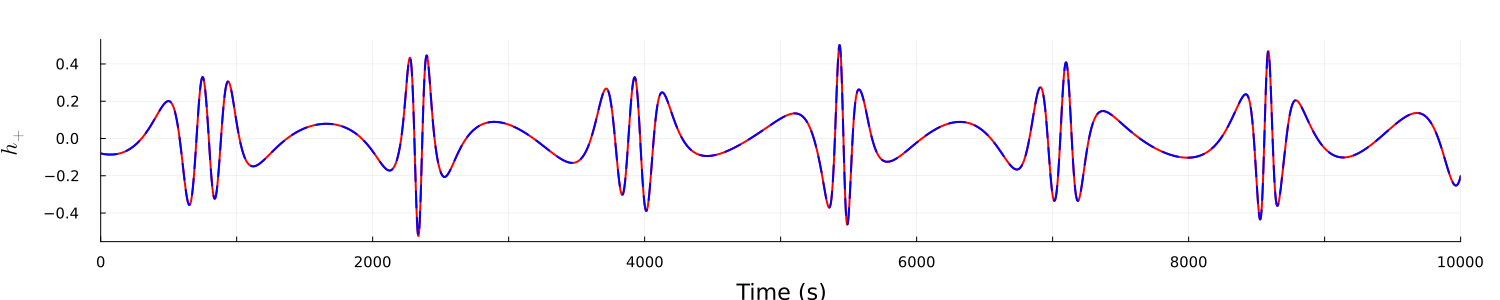

In [33]:
# NOTE: can multiply by "strain_to_SI" to convert waveform to SI units
gr()
p1 = plot(t_Mino_FDM, h_plus_Mino_FDM, 
color=gsl_col,
linestyle=gsl_ls,
linewidth=gsl_lw,
xlims=(0, 10000),
legend =:false,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
foreground_color_legend = nothing, background_color_legend = nothing, dpi=100)

plot!(t_Mino_FDM_turbo, h_plus_Mino_FDM_turbo, 
color=julia_col,
linestyle=julia_ls,
linewidth=julia_lw)

display("image/png", p1)

# Combined Plots

In order to compare each of these approaches, we now plot the evolution of the constants of motion and the gravitational waveform for each method altogether.

### Constants of motion

In [34]:
Mino_FF_Julia_col = :blue;
Mino_FF_Julia_ls = :dash;

BL_GSL_col = :red;
BL_GSL_ls = :solid;

Mino_FDM_turbo_col = :green;
Mino_FDM_turbo_ls = :dot;

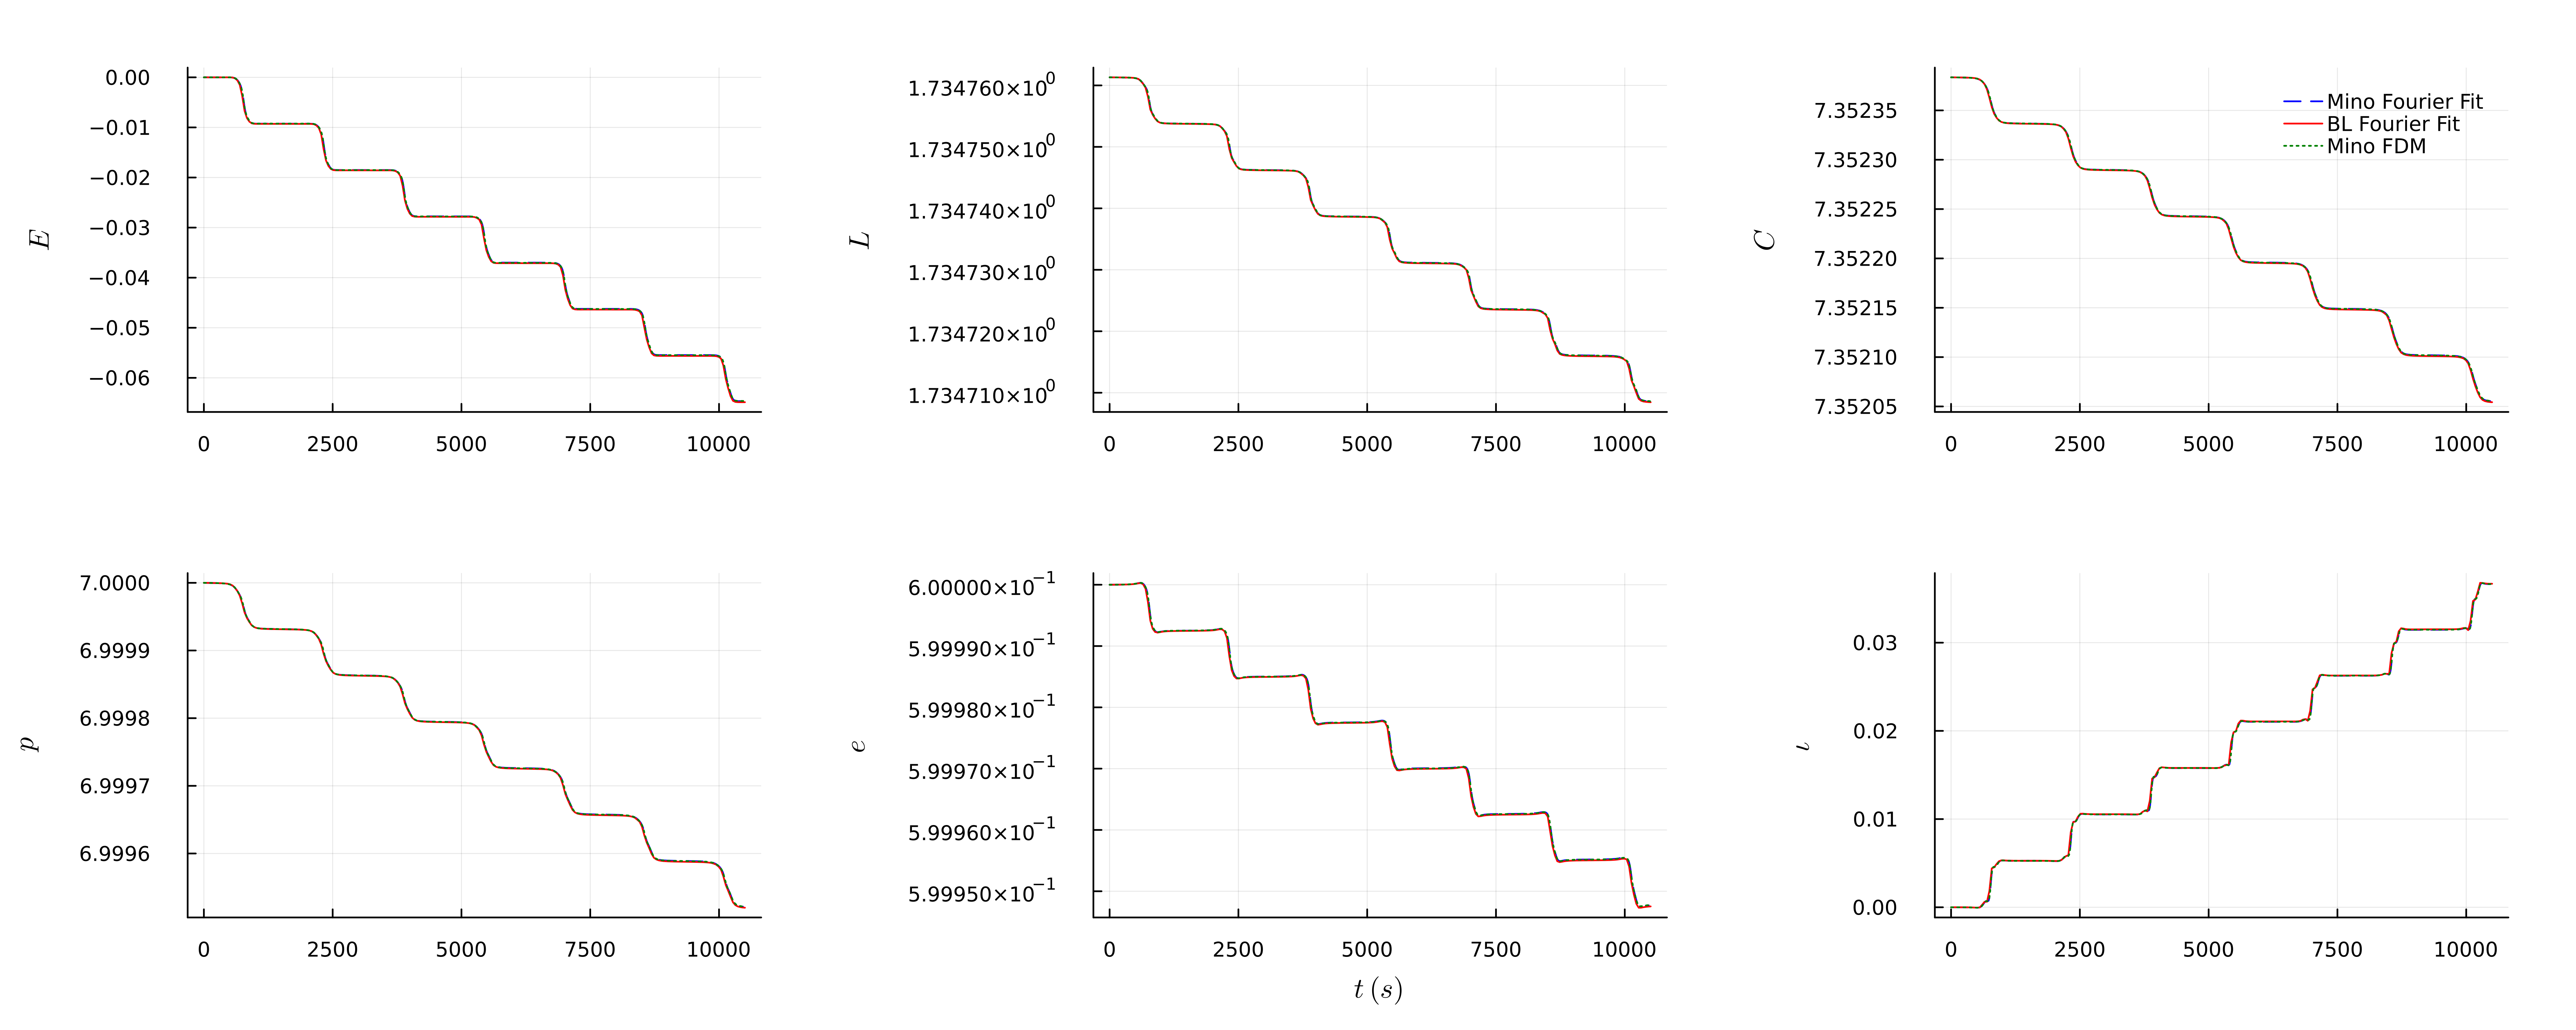

In [35]:
gr()
plotE = Plots.plot(t_Fluxes_Mino_FF_Julia, 1e4 * (EE_Mino_FF_Julia .- EE_Mino_FF_Julia[1]), ylabel=L"E", legend=:false,
    color=Mino_FF_Julia_col, linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotE, t_Fluxes_BL_GSL, 1e4 * (EE_BL_GSL .- EE_BL_GSL[1]), legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotE, t_Fluxes_Mino_FDM_turbo, 1e4 * (EE_Mino_FDM_turbo .- EE_Mino_FDM_turbo[1]), legend=:false, color=Mino_FDM_turbo_col, 
linestyle=Mino_FDM_turbo_ls)

plotL = Plots.plot(t_Fluxes_Mino_FF_Julia, LL_Mino_FF_Julia, ylabel=L"L", legend=:false, color=Mino_FF_Julia_col, linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotL, t_Fluxes_BL_GSL, LL_BL_GSL, legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotL, t_Fluxes_Mino_FDM_turbo, LL_Mino_FDM_turbo, legend=:false, color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)


plotC = Plots.plot(t_Fluxes_Mino_FF_Julia, CC_Mino_FF_Julia, ylabel=L"C", label="Mino Fourier Fit", legend=:topright,
    color=Mino_FF_Julia_col, linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin, foreground_color_legend = nothing, background_color_legend = nothing)
Plots.plot!(plotC, t_Fluxes_BL_GSL, CC_BL_GSL, label="BL Fourier Fit", color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotC, t_Fluxes_Mino_FDM_turbo, CC_Mino_FDM_turbo, label="Mino FDM", color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)

plotP = Plots.plot(t_Fluxes_Mino_FF_Julia, pArray_Mino_FF_Julia, ylabel=L"p", legend=:false,  color=Mino_FF_Julia_col,
    linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotP, t_Fluxes_BL_GSL, pArray_BL_GSL, legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotP, t_Fluxes_Mino_FDM_turbo, pArray_Mino_FDM_turbo, legend=:false, color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)

plotEcc = Plots.plot(t_Fluxes_Mino_FF_Julia, ecc_Mino_FF_Julia, ylabel=L"e", xlabel=L"t\ (s)", legend=:false, color=Mino_FF_Julia_col,
    linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotEcc, t_Fluxes_BL_GSL, ecc_BL_GSL, legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotEcc, t_Fluxes_Mino_FDM_turbo, ecc_Mino_FDM_turbo, legend=:false, color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)

plotι = Plots.plot(t_Fluxes_Mino_FF_Julia, 1e4 * (ι_Mino_FF_Julia .- ι_Mino_FF_Julia[1]), ylabel=L"\iota", legend=:false,
    color=Mino_FF_Julia_col, linestyle=Mino_FF_Julia_ls,
    left_margin		=  left_margin,
    right_margin	=  right_margin,
    top_margin		=  top_margin,
    bottom_margin	=  bottom_margin)
Plots.plot!(plotι, t_Fluxes_BL_GSL,1e4 * (ι_BL_GSL .- ι_BL_GSL[1]), legend=:false, color=BL_GSL_col, linestyle=BL_GSL_ls)
Plots.plot!(plotι, t_Fluxes_Mino_FDM_turbo,1e4 * (ι_Mino_FDM_turbo .- ι_Mino_FDM_turbo[1]), legend=:false, color=Mino_FDM_turbo_col, linestyle=Mino_FDM_turbo_ls)

orbitalParamsPlot=plot(plotE, plotL, plotC, plotP, plotEcc, plotι, layout = @layout([[A B C]; [D E F]]), size=(1500, 600), dpi=500)
display("image/png", orbitalParamsPlot)

### Waveform

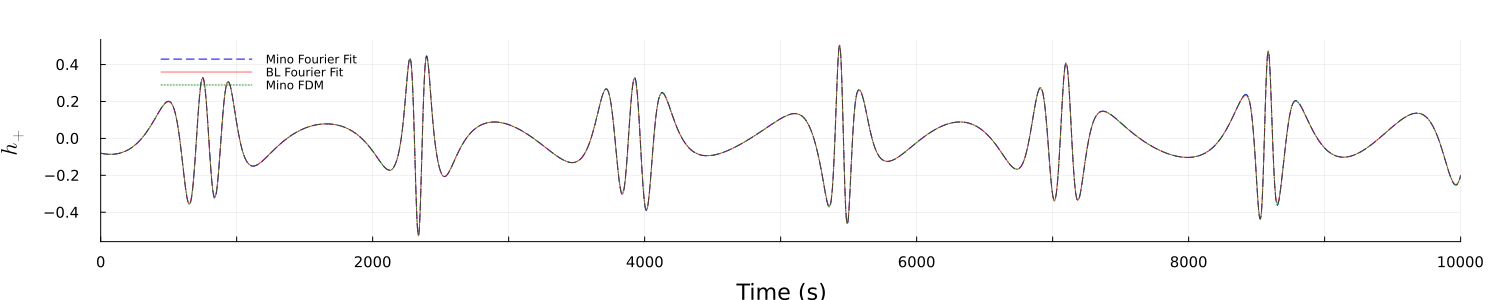

In [36]:
# plot
gr()
p1 = plot(t_Mino_FF_Julia, h_plus_Mino_FF_Julia, 
color=Mino_FF_Julia_col,
linestyle=Mino_FF_Julia_ls,
xlims=(0, 10000),
legend =:topleft,
xticks=(0:1000:10000, ["0", "", "2000", "", "4000", "", "6000", "", "8000", "", "10000"]),
xlabel = "Time (s)",
ylabel = L"h_{+}",
label="Mino Fourier Fit",
size=(wave_width, wave_height),
left_margin		=  left_margin,
right_margin	=  right_margin,
top_margin		=  top_margin,
bottom_margin	=  bottom_margin,
xtickfontsize = xtickfontsize,
ytickfontsize = ytickfontsize,
guidefontsize = guidefontsize,
foreground_color_legend = nothing, background_color_legend = nothing, dpi=100)


plot!(t_BL_GSL, h_plus_BL_GSL, 
color=BL_GSL_col,
linestyle=BL_GSL_ls,
label="BL Fourier Fit", alpha=0.6)

plot!(t_Mino_FDM_turbo, h_plus_Mino_FDM_turbo, 
color=Mino_FDM_turbo_col,
linestyle=Mino_FDM_turbo_ls,
label="Mino FDM", alpha=0.8)
display("image/png", p1)

## References

[1] Sopuerta, C., & Yunes, N. New Kludge Scheme for the Construction of Approximate Waveforms for Extreme-Mass-Ratio Inspirals. [arXiv:1109.0572](https://arxiv.org/abs/1109.0572)

[2] S. Drasco and S. A. Hughes. Rotating black hole orbit functionals in the frequency domain. [arXiv:astro-ph/0308479v3](https://arxiv.org/abs/astro-ph/0308479v3)